### Step 1: Importing all necessary libraries

In [143]:
#importing all libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score

import warnings
warnings.filterwarnings('ignore')

### Inspecting data frame

In [144]:
#reading all data
leads = pd.read_csv('Leads.csv')

In [145]:
#checking head of dataset
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
#checking dimension of dataframe
leads.shape

(9240, 37)

In [5]:
#Statstical aspects of the dataframe
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
#checking info of each column
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [153]:
#check for duplicates
sum(leads.duplicated(subset = 'Prospect ID')) == 0

True

In [154]:
#check for duplicates
sum(leads.duplicated(subset = 'Lead Number')) == 0

True

After looking data we came to knoow that few column have missing values disguised as Select and no duplicates found. Now we need to proceed for Exploratory data Analysis

### Step 2: Exploratory Data Analysis

### Data Cleaning

In [7]:
leads.City.replace('Select', np.NaN, inplace = True)
leads.Specialization.replace('Select', np.NaN, inplace = True)
leads['How did you hear about X Education'].replace('Select', np.NaN, inplace = True)

Now need to see the true missing values now next step is to check percentage of null values in each column


In [8]:
(leads.isnull().sum() / leads.shape[0]) * 100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

Now time to drop column with more than 40% missing values

In [9]:
null_cols = ['Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index',
             'Asymmetrique Profile Score','Asymmetrique Activity Score','How did you hear about X Education',]

In [10]:
leads.drop(null_cols, axis = 1, inplace = True)

Now checking for binary columns

In [11]:
leads['Digital Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [12]:
leads['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [13]:
leads['Receive More Updates About Our Courses'].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [14]:
leads['Update me on Supply Chain Content'].value_counts()

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [15]:
leads['I agree to pay the amount through cheque'].value_counts()

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [16]:
leads['Magazine'].value_counts()

No    9240
Name: Magazine, dtype: int64

In [17]:
leads['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [18]:
leads['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [19]:
leads['Search'].value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

In [20]:
leads['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [21]:
leads['Newspaper'].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [22]:
leads['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [23]:
leads['Get updates on DM Content'].value_counts()

No    9240
Name: Get updates on DM Content, dtype: int64

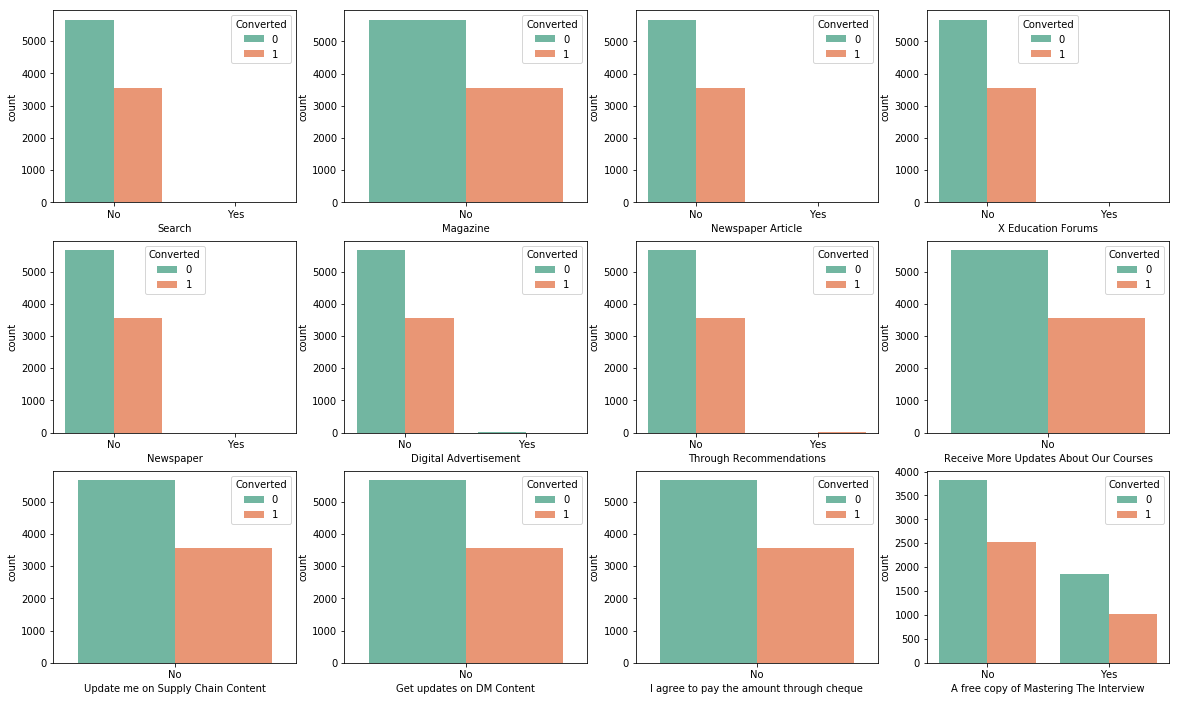

In [155]:
# Visualzing  variables for imbalancing
fig, axs = plt.subplots(3,4,figsize = (20,12))
sns.countplot(x = "Search", hue = "Converted", data = leads, ax = axs[0,0],palette = 'Set2')
sns.countplot(x = "Magazine", hue = "Converted", data = leads, ax = axs[0,1],palette = 'Set2')
sns.countplot(x = "Newspaper Article", hue = "Converted", data = leads, ax = axs[0,2],palette = 'Set2')
sns.countplot(x = "X Education Forums", hue = "Converted", data = leads, ax = axs[0,3],palette = 'Set2')
sns.countplot(x = "Newspaper", hue = "Converted", data = leads, ax = axs[1,0],palette = 'Set2')
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = leads, ax = axs[1,1],palette = 'Set2')
sns.countplot(x = "Through Recommendations", hue = "Converted", data = leads, ax = axs[1,2],palette = 'Set2')
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = leads, ax = axs[1,3],palette = 'Set2')
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data =leads, ax = axs[2,0],palette = 'Set2')
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = leads, ax = axs[2,1],palette = 'Set2')
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = leads, ax = axs[2,2],palette = 'Set2')
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = leads, ax = axs[2,3],palette = 'Set2')
plt.show()

Insights: We can see that all columns except "A free copy of mastering interview" is highly imbalanced hence we will drop them. 

Need to drop highly skewed categorical columns

In [24]:
skewed_cols = ['Magazine','Newspaper Article','Do Not Call','Search','X Education Forums','Newspaper',
               'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
              'Update me on Supply Chain Content','Update me on Supply Chain Content',
               'I agree to pay the amount through cheque','Do Not Email','Get updates on DM Content']

In [25]:
leads.drop(skewed_cols, axis = 1, inplace = True)

Now analysing lead source

In [26]:
leads['Lead Source'].value_counts(normalize = True)*100

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Social Media          0.021730
Press_Release         0.021730
Live Chat             0.021730
Pay per Click Ads     0.010865
WeLearn               0.010865
welearnblog_Home      0.010865
NC_EDM                0.010865
testone               0.010865
blog                  0.010865
youtubechannel        0.010865
Name: Lead Source, dtype: float64

As we can see data is skewed as majority categories contribute only less than 10% hence clubbing together with social mediaafter treating missing values.

In [27]:
leads['Lead Source'].fillna(leads['Lead Source'].mode()[0], inplace = True)

In [28]:
for i in range(len(leads['Lead Source'])):
    if (leads['Lead Source'][i] != 'Google') and (leads['Lead Source'][i] != 'Direct Traffic') and (leads['Lead Source'][i] != 'Olark Chat') and (leads['Lead Source'][i] != 'Organic Search') and (leads['Lead Source'][i] != 'Reference'):
        leads['Lead Source'][i] = leads['Lead Source'][i].replace(leads['Lead Source'][i],'Social Media')

In [29]:
leads['Lead Source'].value_counts(normalize = True)*100

Google            31.428571
Direct Traffic    27.521645
Olark Chat        18.993506
Organic Search    12.489177
Reference          5.779221
Social Media       3.787879
Name: Lead Source, dtype: float64

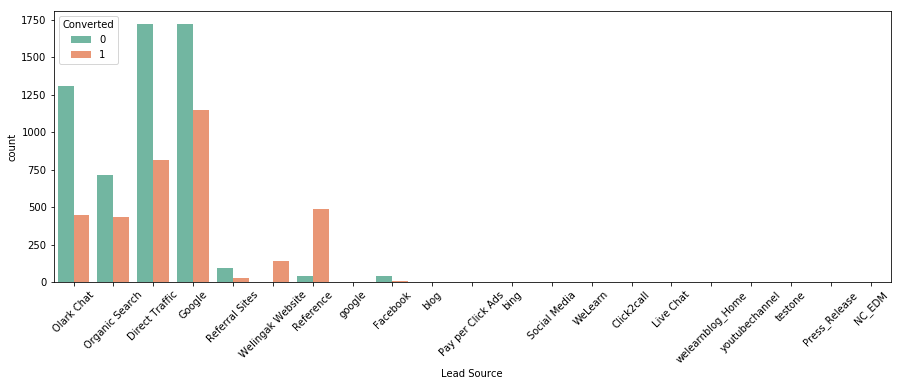

In [156]:
#visualizing count of Lead Source Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Lead Source', hue='Converted' , data =leads , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

Insights: We can see maximum leads was generated by Google and Direct Traffic. 

In [30]:
leads['Lead Source'].isnull().sum()

0

now lead source missing values ttreated, now need to treat total visits missing values

In [31]:
leads['TotalVisits'].fillna(round(leads['TotalVisits'].median(),2), inplace = True)
leads['TotalVisits'].isnull().sum()

0

Now need to treat APge views per visit missing values

In [32]:
leads['Page Views Per Visit'].fillna(round(leads['Page Views Per Visit'].median(),2), inplace = True)


In [33]:
leads['Page Views Per Visit'].isnull().sum()

0

Column City with 15% missing values, gives us more information than the column Country which has 26% missing values. 
Now need to Retain City and dropping Country.

In [34]:
leads.drop(['Country'], axis = 1, inplace = True)

Need to analyse city

In [35]:
leads.City.value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

Here, we can treat Categories - Mumbai and Other Metro Cities - as Tier I, Thane & Outskirts as Tier II, and rest as Tier III

In [36]:
for i in range(len(leads)):
    if (leads.City[i] == 'Mumbai') or (leads.City[i] == 'Other Metro Cities'):
        leads.City[i] = leads.City[i].replace(leads.City[i], 'Tier I Cities')
    if leads.City[i] == 'Thane & Outskirts':
        leads.City[i] = leads.City[i].replace(leads.City[i], 'Tier II Cities')
    if (leads.City[i] == 'Other Cities') or (leads.City[i] == 'Other Cities of Maharashtra'):
        leads.City[i] = leads.City[i].replace(leads.City[i], 'Tier III Cities')

In [ ]:
leads.City.value_counts()

In [38]:
leads.City.isnull().sum()

3669

We still have to treat these missing values hence imputing the missing values with mode

In [39]:
leads.City.fillna(leads.City.mode()[0], inplace = True)

In [40]:
leads.City.isnull().sum()

0

Here need to treat city missing values

In [41]:
leads.City.value_counts()

Tier I Cities      7271
Tier III Cities    1143
Tier II Cities      826
Name: City, dtype: int64

In [42]:
leads['Specialization'].value_counts(normalize = True)*100

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Media and Advertising                 3.464164
Travel and Tourism                    3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: Specialization, dtype: float64

In [43]:
leads.Specialization.fillna('XNA' , inplace = True)
leads = leads.sort_values(by = 'Specialization', ascending = False)

Following a similar approach like City to have the missing values distributed among the top three

In [44]:
random_Specialization = ['Finance Management','Human Resource Management', 'Marketing Management',
                         'Operations Management']

for i in range(len(leads)):
    if leads.Specialization[i] == 'XNA':
        var = random.choice(random_Specialization)
        leads.Specialization[i] = leads.Specialization[i].replace(leads.Specialization[i], var)

Now clubbing all categories other than FInance, HR, Marketing, and operations to other category.

In [45]:
for i in range(len(leads)):
    if (leads.Specialization[i] != 'Finance Management') and (leads.Specialization[i] != 'Human Resource Management') and (leads.Specialization[i] != 'Marketing Management') and (leads.Specialization[i] != 'Operations Management'):
        leads.Specialization[i] = 'Other'

Now its time to treat Specilization

In [46]:
leads['Specialization'].value_counts(normalize = True)*100

Other                        29.166667
Finance Management           19.491342
Marketing Management         19.015152
Human Resource Management    17.954545
Operations Management        14.372294
Name: Specialization, dtype: float64

In [47]:
leads['Specialization'].isnull().sum()

0

In [48]:
leads['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

Clubbing housewife and businessman into other

In [49]:
leads['What is your current occupation'].fillna('XNA' , inplace = True)
leads = leads.sort_values(by = 'What is your current occupation', ascending = False)

In [50]:
random_occupation = ['Unemployed', 'Working Professional', 'Student']

for i in range(len(leads)):
    if leads['What is your current occupation'][i] == 'XNA':
        var = random.choice(random_occupation)
        leads['What is your current occupation'][i] = leads['What is your current occupation'][i].replace(leads['What is your current occupation'][i], var)

In [51]:
leads['What is your current occupation'].value_counts()

Unemployed              6454
Working Professional    1619
Student                 1133
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [52]:
for i in range(len(leads)):
    if (leads['What is your current occupation'][i] == 'Housewife') or (leads['What is your current occupation'][i] == 'Businessman'):
        leads['What is your current occupation'][i] = leads['What is your current occupation'][i].replace(leads['What is your current occupation'][i], 'Other')

In [53]:
leads['What is your current occupation'].value_counts()

Unemployed              6454
Working Professional    1619
Student                 1133
Other                     34
Name: What is your current occupation, dtype: int64

In [54]:
leads['What is your current occupation'].isnull().sum()

0

We treated Occupation column.

In [55]:
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

From this column gives no information to us as all data points to "Better Career Prospects". Dropping this column

In [56]:
leads.drop(['What matters most to you in choosing a course'], axis = 1, inplace = True)


Now need to check categorical columns for more understanding

In [57]:
leads['Lead Origin'].value_counts(normalize = True)*100

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64

Need to club lead import and quick add form to lead add form

In [58]:
for i in range(len(leads)):
    if (leads['Lead Origin'][i] == 'Lead Import') or (leads['Lead Origin'][i] == 'Quick Add Form'):
        leads['Lead Origin'][i] = leads['Lead Origin'][i].replace(leads['Lead Origin'][i], 'Lead Add Form')

In [59]:
leads['Lead Origin'].value_counts(normalize = True)*100


Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               8.376623
Name: Lead Origin, dtype: float64

From above we can get that we have treated Lead origin column. As we can see that Prospect ID and Lead Number gives us same information so we can drop Lead Number column.

In [60]:
leads.drop(['Lead Number'], axis = 1, inplace = True)

Converting 'A free copy of Mastering The Interview' to binary

In [61]:
leads['A free copy of Mastering The Interview'] = leads['A free copy of Mastering The Interview'].map({'Yes':1, 'No':0})


In [62]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 2501 to 4204
Data columns (total 15 columns):
Prospect ID                               9240 non-null object
Lead Origin                               9240 non-null object
Lead Source                               9240 non-null object
Converted                                 9240 non-null int64
TotalVisits                               9240 non-null float64
Total Time Spent on Website               9240 non-null int64
Page Views Per Visit                      9240 non-null float64
Last Activity                             9137 non-null object
Specialization                            9240 non-null object
What is your current occupation           9240 non-null object
Tags                                      5887 non-null object
Lead Profile                              6531 non-null object
City                                      9240 non-null object
A free copy of Mastering The Interview    9240 non-null int64
Last Nota

Checking Outliers

In [63]:
#checking outliers
leads.describe(percentiles = [.25,.5,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440,0.312554
std,0.486714,4.819024,548.021466,2.145781,0.463559
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000,0.000000
75%,1.000000,5.000000,936.000000,3.000000,1.000000
90%,1.000000,7.000000,1380.000000,5.000000,1.000000
95%,1.000000,10.000000,1562.000000,6.000000,1.000000
99%,1.000000,17.000000,1840.610000,9.000000,1.000000


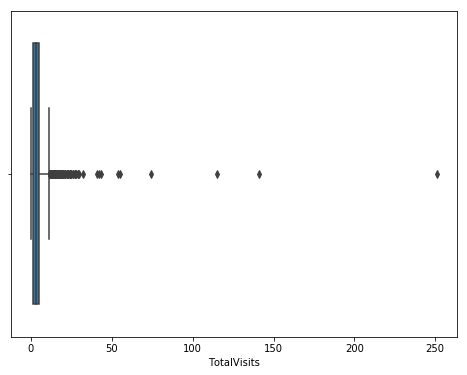

In [64]:
plt.figure(figsize = [8,6])
sns.boxplot('TotalVisits', data = leads)
plt.show()

As the median for both converted and non-converted leads are same , nothing coclusive can be said on the basis of variable TotalVisits

In [65]:
leads = leads[leads.TotalVisits < 30]

In [66]:
leads.shape

(9229, 15)

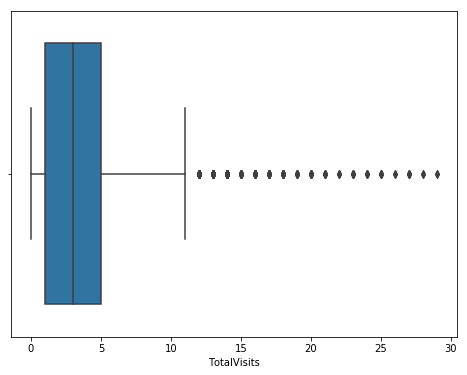

In [67]:
plt.figure(figsize = [8,6])
sns.boxplot('TotalVisits', data = leads)
plt.show()

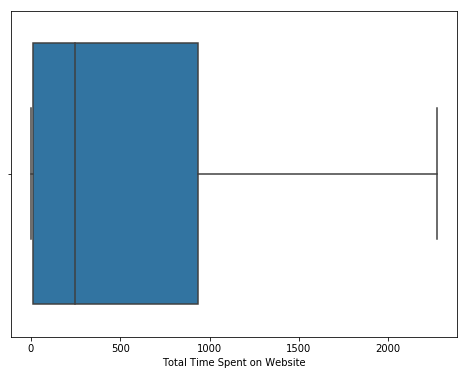

In [68]:
plt.figure(figsize = [8,6])
sns.boxplot('Total Time Spent on Website', data = leads)
plt.show()

Observed that there are no major outliers for the above variable, outlier treatment is not required for it.

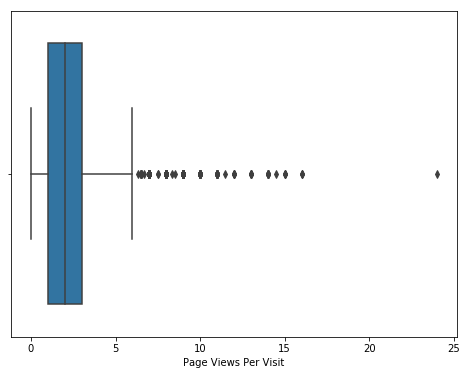

In [69]:
plt.figure(figsize = [8,6])
sns.boxplot('Page Views Per Visit', data = leads)
plt.show()

## Multivariate Analysis

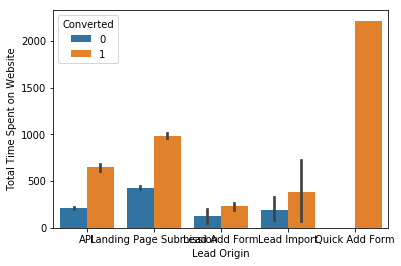

In [146]:
import seaborn as sns
#sns.set_theme()
sns.barplot(x = leads['Lead Origin'], y = leads['Total Time Spent on Website'], hue = leads['Converted'])
plt.show()

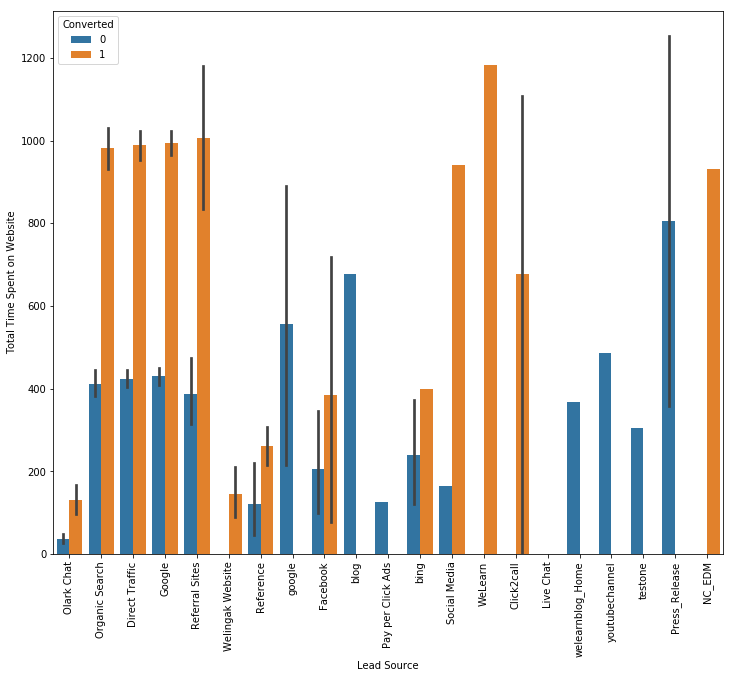

In [147]:
plt.figure(figsize = [12,10])
#sns.set_theme()
sns.barplot(x = leads['Lead Source'], y = leads['Total Time Spent on Website'], hue = leads['Converted'])
plt.xticks(rotation = 90)
plt.show()

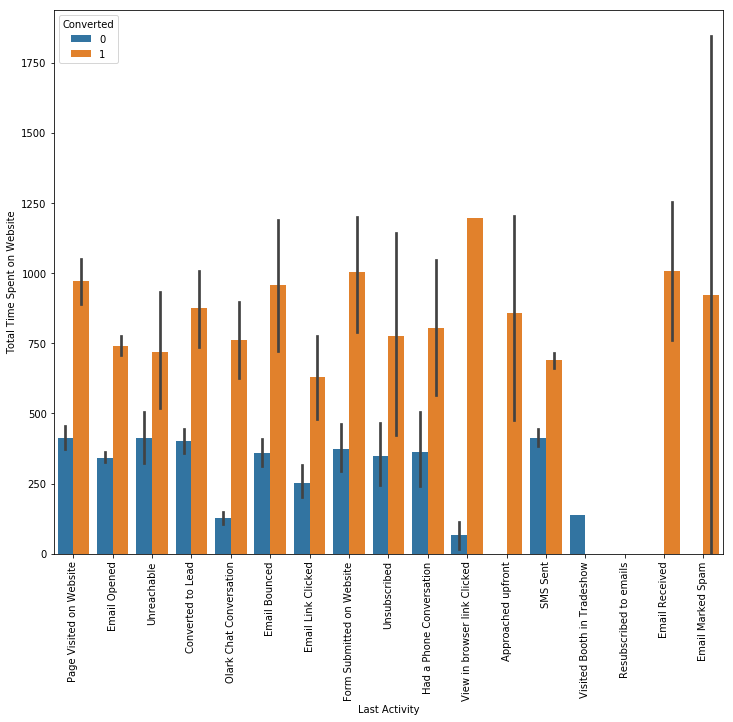

In [148]:
plt.figure(figsize = [12,10])

sns.barplot(x = leads['Last Activity'], y = leads['Total Time Spent on Website'], hue = leads['Converted'])
plt.xticks(rotation = 90)
plt.show()

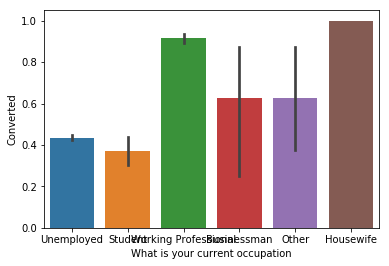

In [149]:
sns.barplot(x = leads['What is your current occupation'], y = leads['Converted'])
plt.show()

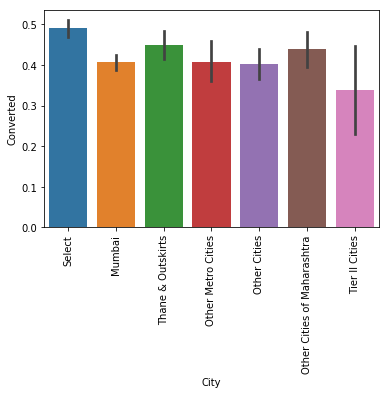

In [150]:

sns.barplot(x = leads['City'], y = leads['Converted'])
plt.xticks(rotation = 90)
plt.show()

<Figure size 1728x1728 with 0 Axes>

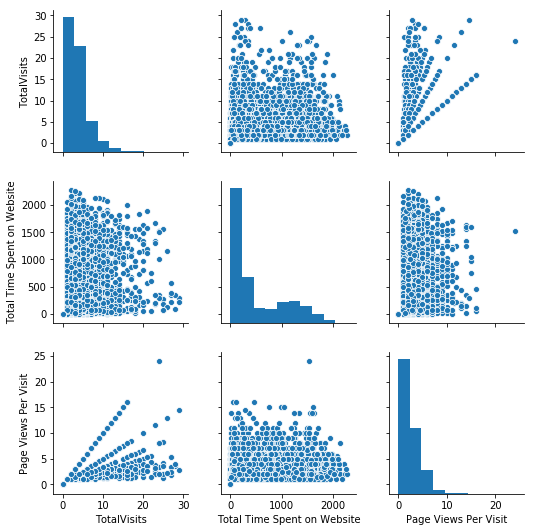

In [75]:
numerical_cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

plt.figure(figsize = [24,24])
sns.pairplot(leads[numerical_cols])
plt.show()

We need to drop Last Activity,Lead Profile,Last Notable Activity and Tags which we do not need in analysis.

In [76]:
sales_cols = ['Last Activity','Lead Profile','Last Notable Activity','Tags']

In [77]:
leads.drop(sales_cols, axis = 1, inplace = True)
leads.shape

(9229, 11)

# Step 2: Data Preparation
- Creating Dummies for Categorical Variables
- Performing Train-Test Split
- Performing Scaling 

In [78]:
# Reassranging columns for seggregating categorical and numerical columns 

leads = leads[['Prospect ID','Lead Origin', 'Lead Source', 'Specialization',
                 'What is your current occupation','City','A free copy of Mastering The Interview',
                'TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]

In [79]:
leads.head()

,Prospect ID,Lead Origin,Lead Source,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted
2501,0fced7d9-80fb-45fd-ae24-9b81431800c9,Landing Page Submission,Direct Traffic,Operations Management,Student,Tier I Cities,1,10.0,1395,5.0,0
7505,78318c39-6b46-4e70-a587-29837cee1b4e,Landing Page Submission,Social Media,Other,Student,Tier I Cities,1,12.0,1252,12.0,0
7645,021ff8a2-9b16-49d8-8ec2-941391c77bce,API,Olark Chat,Human Resource Management,Unemployed,Tier I Cities,0,0.0,0,0.0,0
624,ff8daf82-a795-4276-8443-67437cec918c,Landing Page Submission,Organic Search,Other,Unemployed,Tier III Cities,1,3.0,145,3.0,0
6520,68ce5663-48b6-4674-9b42-f5c7cd9079d0,Landing Page Submission,Direct Traffic,Other,Unemployed,Tier I Cities,1,3.0,385,3.0,0


In [80]:
categorical_cols = ['Lead Origin', 'Lead Source', 'Specialization','What is your current occupation','City']


## Need to create dummies for categorical columns

In [81]:
for col_name in categorical_cols:
    new_df = pd.get_dummies(leads[col_name], prefix = col_name, drop_first = True)
    leads = pd.concat([leads, new_df], axis = 1)
    leads.drop(col_name, axis = 1, inplace = True)

In [82]:
leads.head()

,Prospect ID,A free copy of Mastering The Interview,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,...,Lead Source_Social Media,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Tier II Cities,City_Tier III Cities
2501,0fced7d9-80fb-45fd-ae24-9b81431800c9,1,10.0,1395,5.0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
7505,78318c39-6b46-4e70-a587-29837cee1b4e,1,12.0,1252,12.0,0,1,0,0,0,...,1,0,0,0,1,1,0,0,0,0
7645,021ff8a2-9b16-49d8-8ec2-941391c77bce,0,0.0,0,0.0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
624,ff8daf82-a795-4276-8443-67437cec918c,1,3.0,145,3.0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,1
6520,68ce5663-48b6-4674-9b42-f5c7cd9079d0,1,3.0,385,3.0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0


## Splitting the data into train and test

In [83]:
df_train, df_test = train_test_split(leads, train_size = 0.7, random_state = 100)


In [84]:
numerical_cols

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

## Feature Scaling

In [85]:
scaler = MinMaxScaler()
df_train[numerical_cols] = scaler.fit_transform(df_train[numerical_cols])
df_train.head()

,Prospect ID,A free copy of Mastering The Interview,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,...,Lead Source_Social Media,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Tier II Cities,City_Tier III Cities
2765,8e5f90b6-cf07-4d59-a22a-bc3f34048b98,0,0.000000,0.000000,0.000000,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
7499,383d9485-5859-4e11-b9b7-31325357b4d3,0,0.068966,0.143926,0.083333,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
709,4d00b9be-fa39-44fd-8a9f-ed5960d80c77,0,0.034483,0.529489,0.041667,1,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
4635,288c7a59-3294-4e8f-89ec-c25620abfe24,1,0.103448,0.245599,0.125000,1,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
5699,2dda3090-e7a8-40dc-8817-8dd9a46c0e67,0,0.000000,0.000000,0.000000,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0


In [86]:
df_train.describe()

,A free copy of Mastering The Interview,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Lead Source_Social Media,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Tier II Cities,City_Tier III Cities
count,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,...,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000,6460.000000
mean,0.313313,0.116510,0.218230,0.098172,0.388390,0.525697,0.082663,0.318885,0.186378,0.129721,...,0.037926,0.182043,0.192570,0.142724,0.293963,0.122136,0.694272,0.179721,0.090402,0.124923
std,0.463876,0.117510,0.243020,0.086358,0.487422,0.499378,0.275393,0.466081,0.389441,0.336023,...,0.191031,0.385910,0.394348,0.349819,0.455610,0.327468,0.460751,0.383985,0.286780,0.330657
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.034483,0.007042,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.103448,0.111796,0.083333,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.172414,0.416813,0.125000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [87]:
y_train = df_train.Converted
X_train = df_train.drop(['Converted','Prospect ID'],axis =1)

In [88]:
X_train.shape

(6460, 20)

In [89]:
y_train.shape

(6460L,)

In [90]:
y_test = df_test.Converted
X_test = df_test.drop(['Converted','Prospect ID'],axis =1)

In [91]:
X_test.shape

(2769, 20)

In [92]:
y_test.shape

(2769L,)

### Checking correlation between the numerical columns to understand the data better


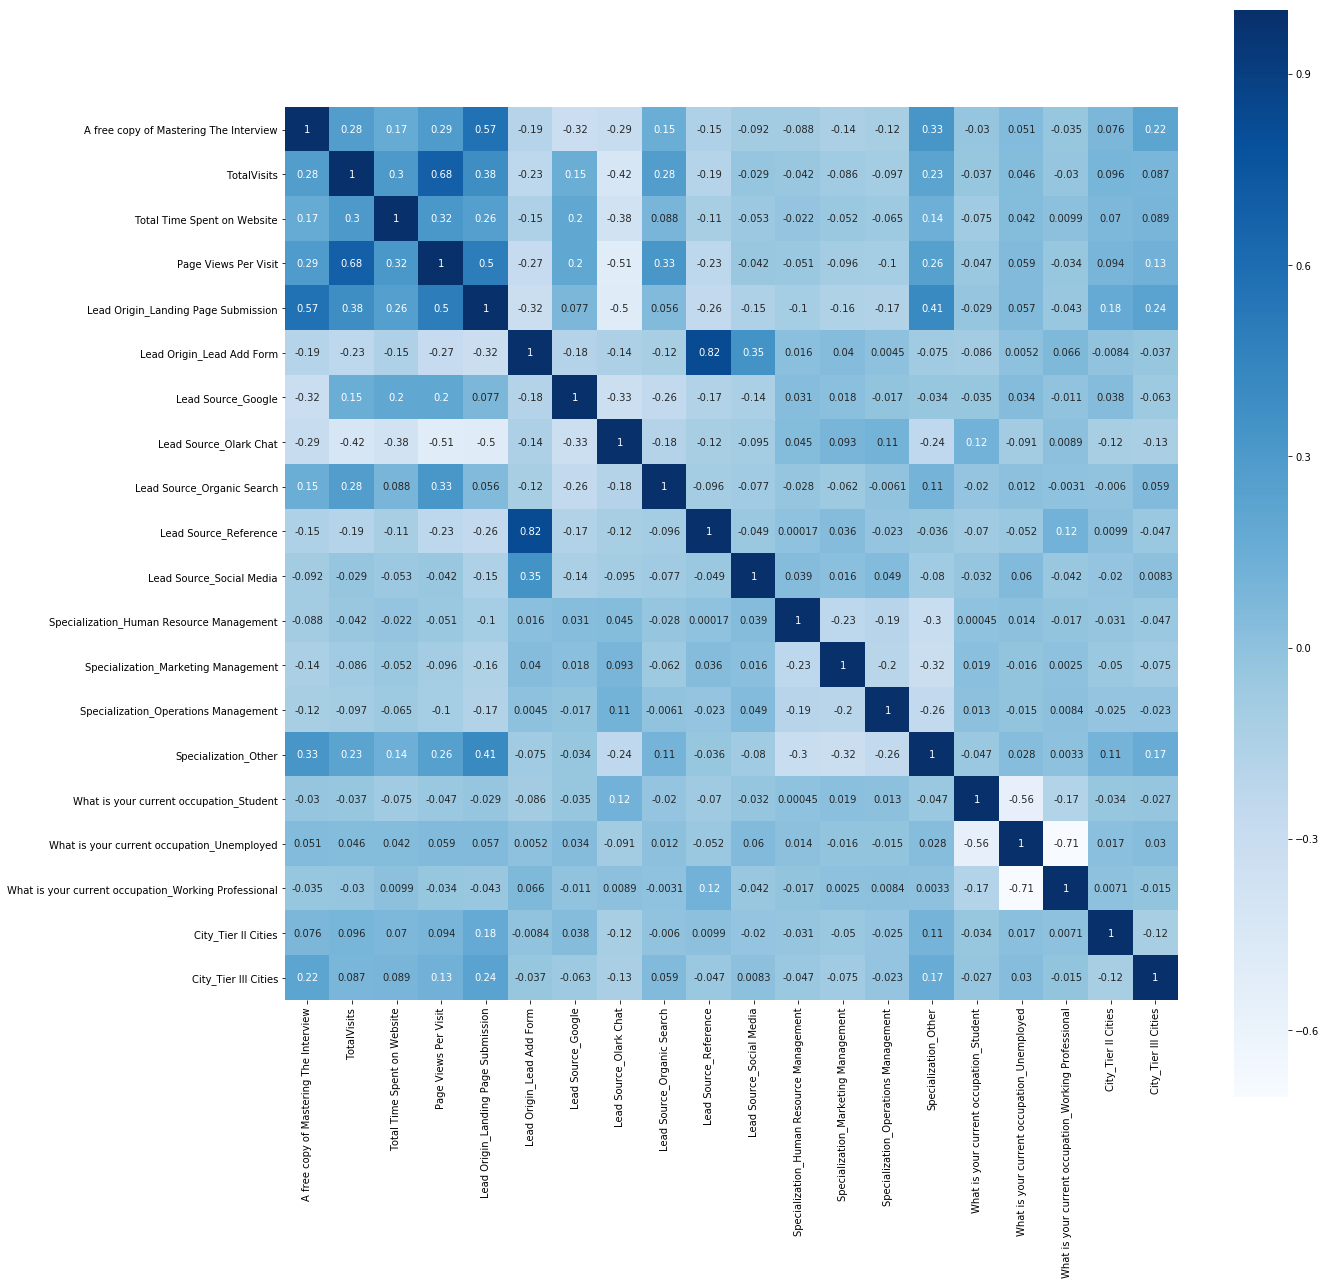

In [93]:
corr = X_train.corr()

plt.figure(figsize = [20,20])
sns.heatmap(corr, annot = True, square = True, cmap = 'Blues')
plt.show()

## Insights: Dropping highly correlated dummy variables

In [94]:
drop_cols = ['Lead Origin_Landing Page Submission','TotalVisits',
             'A free copy of Mastering The Interview','Lead Origin_Lead Add Form','Lead Source_Organic Search']

In [95]:
# Dropping the columns to overcome multicollinearity

X_train.drop(drop_cols, axis = 1, inplace = True)

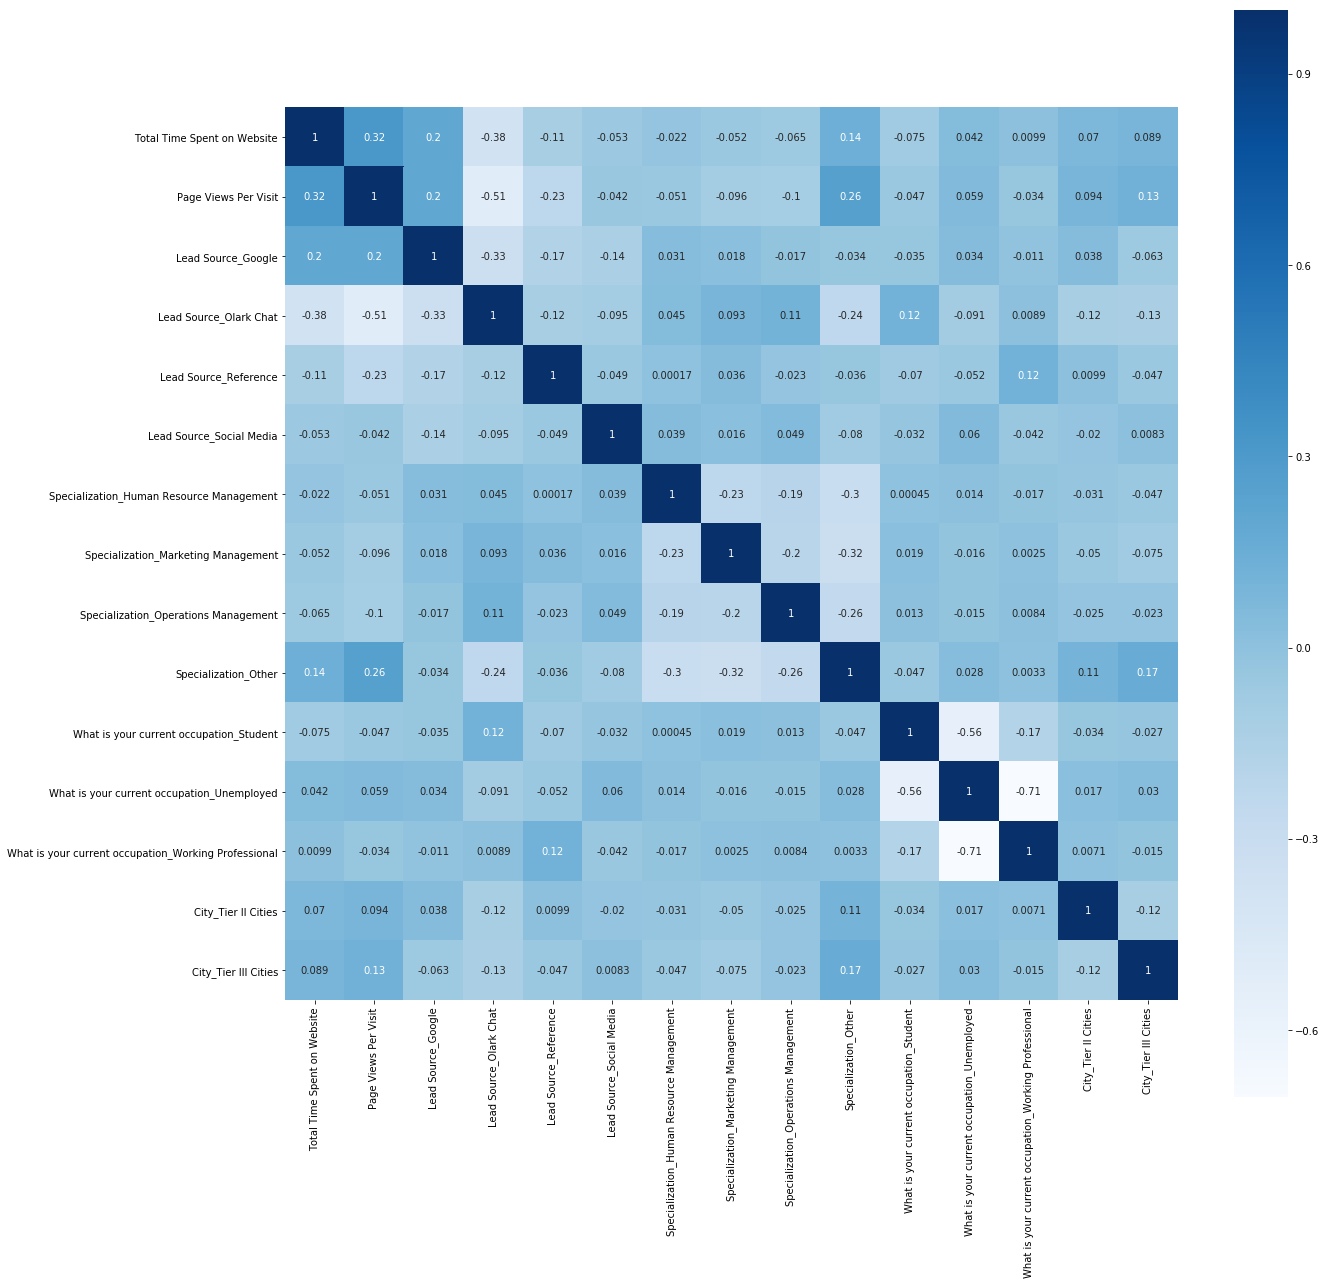

In [96]:
corr = X_train.corr()

plt.figure(figsize = [20,20])
sns.heatmap(corr, annot = True, square = True, cmap = 'Blues')
plt.show()

# STEP 3: Model Building
- Variable selection using RFE
- Building a Logistic Model with good sensitivity
- Check p-value and VIF
- Find optimal probability cut-off
- Check model performance over test data
- Generate Score variable

In [97]:
logm1 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6460
Model:                            GLM   Df Residuals:                     6444
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3361.4
Date:                Tue, 09 Aug 2022   Deviance:                       6722.7
Time:                        11:06:31   Pearson chi2:                 6.56e+03
No. Iterations:                     6   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2239      0.565     -0.397      0.692      -1.331       0.883
Total Time Spent on Website                              4.3399      0.146     29.794      0.000       4.054       4.625
Page Views Per Visit                                    -0.8247      0.435     -1.894      0.058      -1.678       0.029
Lead Source_Google                                       0.3247      0.072      4.539      0.000       0.185       0.465
Lead Source_Olark Chat                                   0.7711      0.110      7.022      0.000       0.556       0.986
Lead Source_Reference                                    4.1686      0.219     19.056      0.000       3.740       4.597
Lead Source_Social Media                                 1.6052      0.153     10.519      0.000       1.306       1.904
Specialization_Human Resource Management                 0.0496      0.100      0.496      0.620      -0.146       0.246
Specialization_Marketing Management                      0.1004      0.099      1.015      0.310      -0.094       0.294
Specialization_Operations Management                     0.1395      0.106      1.315      0.188      -0.068       0.347
Specialization_Other                                     0.2814      0.093      3.039      0.002       0.100       0.463
What is your current occupation_Student                 -2.7347      0.564     -4.845      0.000      -3.841      -1.628
What is your current occupation_Unemployed              -1.7805      0.556     -3.202      0.001      -2.870      -0.691
What is your current occupation_Working Professional    -1.5370      0.559     -2.748      0.006      -2.633      -0.441
City_Tier II Cities                                      0.1147      0.106      1.083      0.279      -0.093       0.322
City_Tier III Cities                                     0.1340      0.093      1.445      0.148      -0.048       0.316
========================================================================================================================
"""

In [98]:
logreg = LogisticRegression()
rfe = RFE(logreg,12)
rfe = rfe.fit(X_train,y_train)

In [99]:
rfe.support_

array([ True,  True,  True,  True,  True,  True, False, False, False,
        True,  True,  True,  True,  True,  True])

In [100]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Social Media', True, 1),
 ('Specialization_Human Resource Management', False, 4),
 ('Specialization_Marketing Management', False, 3),
 ('Specialization_Operations Management', False, 2),
 ('Specialization_Other', True, 1),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Tier II Cities', True, 1),
 ('City_Tier III Cities', True, 1)]

In [101]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]

In [102]:
X_train.columns[~rfe.support_]

Index([u'Specialization_Human Resource Management',
       u'Specialization_Marketing Management',
       u'Specialization_Operations Management'],
      dtype='object')

### Assessing model with statsmodel: MODEL 1

In [103]:
#building model 1
X_train_sm = sm.add_constant(X_train[col])

logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6460
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3362.4
Date:                Tue, 09 Aug 2022   Deviance:                       6724.7
Time:                        11:06:40   Pearson chi2:                 6.57e+03
No. Iterations:                     6   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1406      0.561     -0.251      0.802      -1.240       0.958
Total Time Spent on Website                              4.3376      0.146     29.784      0.000       4.052       4.623
Page Views Per Visit                                    -0.8347      0.435     -1.918      0.055      -1.688       0.018
Lead Source_Google                                       0.3260      0.071      4.560      0.000       0.186       0.466
Lead Source_Olark Chat                                   0.7767      0.110      7.078      0.000       0.562       0.992
Lead Source_Reference                                    4.1654      0.219     19.054      0.000       3.737       4.594
Lead Source_Social Media                                 1.6131      0.152     10.581      0.000       1.314       1.912
Specialization_Other                                     0.2142      0.070      3.040      0.002       0.076       0.352
What is your current occupation_Student                 -2.7511      0.565     -4.869      0.000      -3.859      -1.644
What is your current occupation_Unemployed              -1.7957      0.557     -3.226      0.001      -2.887      -0.705
What is your current occupation_Working Professional    -1.5508      0.560     -2.770      0.006      -2.648      -0.453
City_Tier II Cities                                      0.1144      0.106      1.080      0.280      -0.093       0.322
City_Tier III Cities                                     0.1352      0.093      1.459      0.145      -0.046       0.317
========================================================================================================================
"""

### Its time to drop column with the highest p-value

In [104]:
col = col.drop('City_Tier II Cities')

In [105]:
#building model 2
X_train_sm = sm.add_constant(X_train[col])

logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6460
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3363.0
Date:                Tue, 09 Aug 2022   Deviance:                       6725.9
Time:                        11:06:43   Pearson chi2:                 6.57e+03
No. Iterations:                     6   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1293      0.560     -0.231      0.818      -1.227       0.969
Total Time Spent on Website                              4.3405      0.146     29.809      0.000       4.055       4.626
Page Views Per Visit                                    -0.8216      0.435     -1.889      0.059      -1.674       0.031
Lead Source_Google                                       0.3249      0.071      4.546      0.000       0.185       0.465
Lead Source_Olark Chat                                   0.7685      0.109      7.024      0.000       0.554       0.983
Lead Source_Reference                                    4.1652      0.219     19.056      0.000       3.737       4.594
Lead Source_Social Media                                 1.6091      0.152     10.560      0.000       1.310       1.908
Specialization_Other                                     0.2210      0.070      3.149      0.002       0.083       0.359
What is your current occupation_Student                 -2.7537      0.565     -4.878      0.000      -3.860      -1.647
What is your current occupation_Unemployed              -1.7966      0.556     -3.230      0.001      -2.887      -0.706
What is your current occupation_Working Professional    -1.5504      0.559     -2.772      0.006      -2.647      -0.454
City_Tier III Cities                                     0.1195      0.092      1.306      0.192      -0.060       0.299
========================================================================================================================
"""

### need to drop column of highest p-value

In [106]:
col = col.drop('City_Tier III Cities')

In [107]:
#building model 3
X_train_sm = sm.add_constant(X_train[col])

logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6460
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3363.8
Date:                Tue, 09 Aug 2022   Deviance:                       6727.6
Time:                        11:06:45   Pearson chi2:                 6.56e+03
No. Iterations:                     6   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1138      0.561     -0.203      0.839      -1.213       0.985
Total Time Spent on Website                              4.3450      0.146     29.846      0.000       4.060       4.630
Page Views Per Visit                                    -0.8063      0.435     -1.855      0.064      -1.658       0.045
Lead Source_Google                                       0.3138      0.071      4.423      0.000       0.175       0.453
Lead Source_Olark Chat                                   0.7560      0.109      6.942      0.000       0.543       0.969
Lead Source_Reference                                    4.1527      0.218     19.020      0.000       3.725       4.581
Lead Source_Social Media                                 1.6055      0.152     10.539      0.000       1.307       1.904
Specialization_Other                                     0.2321      0.070      3.331      0.001       0.096       0.369
What is your current occupation_Student                 -2.7556      0.565     -4.874      0.000      -3.864      -1.648
What is your current occupation_Unemployed              -1.7953      0.557     -3.223      0.001      -2.887      -0.704
What is your current occupation_Working Professional    -1.5504      0.560     -2.768      0.006      -2.648      -0.452
========================================================================================================================
"""

In [108]:
col = col.drop('What is your current occupation_Working Professional')

In [109]:
#building model 4
X_train_sm = sm.add_constant(X_train[col])
res = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6460
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3368.2
Date:                Tue, 09 Aug 2022   Deviance:                       6736.4
Time:                        11:06:47   Pearson chi2:                 6.57e+03
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -1.6348      0.108    -15.148      0.000      -1.846      -1.423
Total Time Spent on Website                    4.3441      0.145     29.867      0.000       4.059       4.629
Page Views Per Visit                          -0.7950      0.434     -1.832      0.067      -1.645       0.055
Lead Source_Google                             0.3095      0.071      4.368      0.000       0.171       0.448
Lead Source_Olark Chat                         0.7520      0.109      6.913      0.000       0.539       0.965
Lead Source_Reference                          4.1476      0.218     19.005      0.000       3.720       4.575
Lead Source_Social Media                       1.6013      0.152     10.511      0.000       1.303       1.900
Specialization_Other                           0.2343      0.070      3.367      0.001       0.098       0.371
What is your current occupation_Student       -1.2335      0.123    -10.017      0.000      -1.475      -0.992
What is your current occupation_Unemployed    -0.2735      0.077     -3.539      0.000      -0.425      -0.122
==============================================================================================================
"""

## Since the Model 4 seems to be stable with significant p-values, we shall go ahead with this model for further analysis

In [151]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

TypeError: cannot convert the series to <type 'float'>

### Insights: All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

# Predicting a Train model

In [111]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2765    0.939755
7499    0.119232
709     0.661119
4635    0.330387
5699    0.939755
2247    0.585493
3371    0.651539
8175    0.458127
6318    0.281354
1337    0.326178
dtype: float64

In [112]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.93975456, 0.1192317 , 0.66111895, 0.3303866 , 0.93975456,
       0.58549258, 0.6515389 , 0.45812677, 0.28135403, 0.32617837])

In [113]:
y_train_pred_final = pd.DataFrame({'Hot_Lead':y_train.values, 'Hot_Lead_Prob': y_train_pred})
y_train_pred_final['Cust_ID'] = y_train.index
y_train_pred_final.head()

,Hot_Lead,Hot_Lead_Prob,Cust_ID
0,1,0.939755,2765
1,0,0.119232,7499
2,1,0.661119,709
3,1,0.330387,4635
4,1,0.939755,5699


In [114]:
y_train_pred_final = y_train_pred_final.sort_values(by = 'Hot_Lead_Prob', ascending = False)
y_train_pred_final.head()

,Hot_Lead,Hot_Lead_Prob,Cust_ID
3885,1,0.998318,6712
6429,1,0.997087,8074
6142,1,0.996604,1548
6271,1,0.996572,3478
6150,1,0.996452,4123


### PLOTTING ROC CURVE
An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

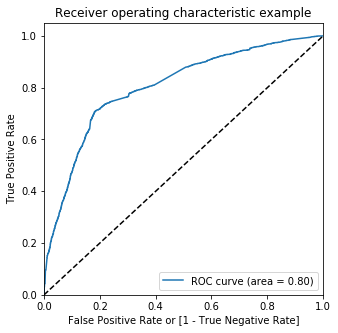

In [115]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_pred_final.Hot_Lead, y_train_pred_final.Hot_Lead_Prob)

### ROC curve should be close to 1. From above graph we can see that we are getting ROC curve as 0.80 which indicates good predective model.

## Now need to find optimal cutoff point

In [116]:
# Creating columns with probability cut-offs

numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Hot_Lead_Prob.map(lambda x: 1 if x > i else 0)

y_train_pred_final.head()

,Hot_Lead,Hot_Lead_Prob,Cust_ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
3885,1,0.998318,6712,1,1,1,1,1,1,1,1,1,1
6429,1,0.997087,8074,1,1,1,1,1,1,1,1,1,1
6142,1,0.996604,1548,1,1,1,1,1,1,1,1,1,1
6271,1,0.996572,3478,1,1,1,1,1,1,1,1,1,1
6150,1,0.996452,4123,1,1,1,1,1,1,1,1,1,1


In [117]:
cutoff_df = pd.DataFrame(columns = ['cutoff','accuracy','sensitivity','specificity'])

numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    confusion = metrics.confusion_matrix(y_train_pred_final.Hot_Lead, y_train_pred_final[i])
    total = sum(sum(confusion))
    
    accuracy = (confusion[1,1] + confusion[0,0])/total
    sensitivity = confusion[1,1]/(confusion[1,1]+confusion[1,0])
    specificity = confusion[0,0]/(confusion[0,0]+confusion[0,1])
    cutoff_df.loc[i] = [i, accuracy, sensitivity, specificity]

print(cutoff_df)

     cutoff  accuracy  sensitivity  specificity
0.0     0.0       0.0          1.0          0.0
0.1     0.1       0.0          0.0          0.0
0.2     0.2       0.0          0.0          0.0
0.3     0.3       0.0          0.0          0.0
0.4     0.4       0.0          0.0          0.0
0.5     0.5       0.0          0.0          0.0
0.6     0.6       0.0          0.0          0.0
0.7     0.7       0.0          0.0          0.0
0.8     0.8       0.0          0.0          0.0
0.9     0.9       0.0          0.0          0.0


<Figure size 864x864 with 0 Axes>

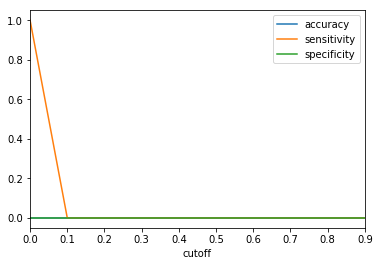

In [118]:
plt.figure(figsize = [12,12])
cutoff_df.plot.line(x = 'cutoff', y = ['accuracy','sensitivity','specificity'])
plt.xticks(numbers)
plt.show()

### Probability Threshold is 0.29 (closer to 0.3) But considering 0.25 to tradeoff sensitivity against accuracy

In [119]:
y_train_pred_final.Predicted = y_train_pred_final.Hot_Lead_Prob.map(lambda x: 1 if x > 0.25 else 0)

In [120]:
#Looking at the confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Hot_Lead, y_train_pred_final.Predicted)
confusion

array([[2490, 1461],
       [ 498, 2011]], dtype=int64)

In [121]:
sensitivity = confusion[1,1]/(confusion[1,1] + confusion[1,0])
sensitivity*100

0

In [122]:
accuracy = metrics.accuracy_score(y_train_pred_final.Hot_Lead, y_train_pred_final.Predicted)
accuracy*100

69.6749226006192

In [152]:
specificity = confusion[0,0]/(confusion[0,0]+confusion[0,1])
specificity*100

0

## Sensitivity of our  training data set is 78.35%

In [124]:
#precision and recall
precision_score(y_train_pred_final.Hot_Lead, y_train_pred_final.Predicted)

0.5792050691244239

In [125]:
recall_score(y_train_pred_final.Hot_Lead, y_train_pred_final.Predicted)

0.8015145476285372

In [126]:
precision, recall, thresholds = precision_recall_curve(y_train_pred_final.Hot_Lead, y_train_pred_final.Hot_Lead_Prob)


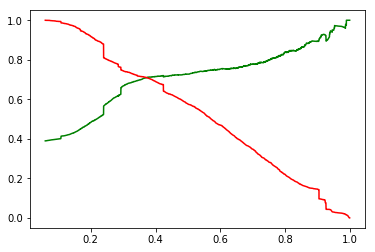

In [127]:
plt.plot(thresholds, precision[:-1], "g-")
plt.plot(thresholds, recall[:-1], "r-")
plt.show()

# Predicting on Test dataset

In [128]:
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols]) 

In [129]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Page Views Per Visit,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Social Media,Specialization_Other,What is your current occupation_Student,What is your current occupation_Unemployed
442,0.028169,0.125000,0,0,0,1,0,0,1
9018,0.125000,0.083333,1,0,0,0,0,0,1
1841,0.125000,0.125000,1,0,0,0,0,0,1
2868,0.353433,0.083333,1,0,0,0,0,0,1
8910,0.061180,0.250000,0,0,0,0,0,0,1


In [130]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_test_1 = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)
y_test_df['Cust_ID'] = y_test_df.index
y_test_df.reset_index(drop = True, inplace = True)
y_test_1.reset_index(drop = True, inplace = True)
y_pred_final = pd.concat([y_test_1,y_test_df], axis = 1)
y_pred_final = y_pred_final.rename(columns = {0:'Hot_Lead_Prob'})
y_pred_final = y_pred_final[['Cust_ID','Converted','Hot_Lead_Prob']]

In [131]:
y_pred_final['Final_Predicted'] = y_pred_final.Hot_Lead_Prob.map(lambda x: 1 if x > 0.25 else 0)


In [132]:
y_pred_final = y_pred_final.sort_values(by = 'Hot_Lead_Prob', ascending = False)


In [157]:
y_pred_final.head()

,Cust_ID,Converted,Hot_Lead_Prob,Final_Predicted,Score
1871,3032,1,0.997497,1,99.75
1536,639,1,0.997283,1,99.73
2016,5293,1,0.997055,1,99.71
319,2656,1,0.996787,1,99.68
2477,4832,1,0.996252,1,99.63


In [134]:
y_pred_final['Score'] = y_pred_final.Hot_Lead_Prob.apply(lambda x: round(x*100,2))
y_pred_final

,Cust_ID,Converted,Hot_Lead_Prob,Final_Predicted,Score
1871,3032,1,0.997497,1,99.75
1536,639,1,0.997283,1,99.73
2016,5293,1,0.997055,1,99.71
319,2656,1,0.996787,1,99.68
2477,4832,1,0.996252,1,99.63
1287,739,1,0.995981,1,99.60
2113,818,1,0.995218,1,99.52
333,8086,1,0.994942,1,99.49
1984,6028,1,0.994135,1,99.41
616,3424,1,0.994045,1,99.40


In [135]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_Predicted)
confusion2

array([[1108,  610],
       [ 234,  817]], dtype=int64)

In [136]:
accuracy_test = metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_Predicted)
accuracy_test*100

69.51968219573853

In [137]:
# sensitivity

sensitivity_test = confusion2[1,1]/(confusion2[1,1]+confusion2[1,0])
sensitivity_test*100

0

In [138]:
# specificity

specificity_test = confusion2[0,0]/(confusion2[0,1]+confusion2[0,0])
specificity_test*100

0

Sensitivity of our Testing Dataset is 76.49%

Difference between Sensitivity scores of Train and Test = 78.35-76.49= 1.86%

# Insights:
After running the model on the Test Data these are the figures we obtain:

Accuracy : 69.51%
Sensitivity :76.49%
Specificity : 63.62%

Final Conclusion:
On the given data set we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics.
We also have considered the optimal cut off based on Sensitivity and Specificity for calculating the final prediction.
Accuracy, Sensitivity and Specificity values of test set are around 69.51%, 76.49% and 63.62% which are approximately closer to the respective values calculated using trained set.
Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is around 80%
Hence overall this model seems to be good.
